<a href="https://colab.research.google.com/github/tecexbarto/Mobile_phone/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DESARROLLO DE UN SISTEMA DE RECOMENDACIÓN IMPLEMENTADO EN UN DATASET DE TELÉFONOS MÓVILES***

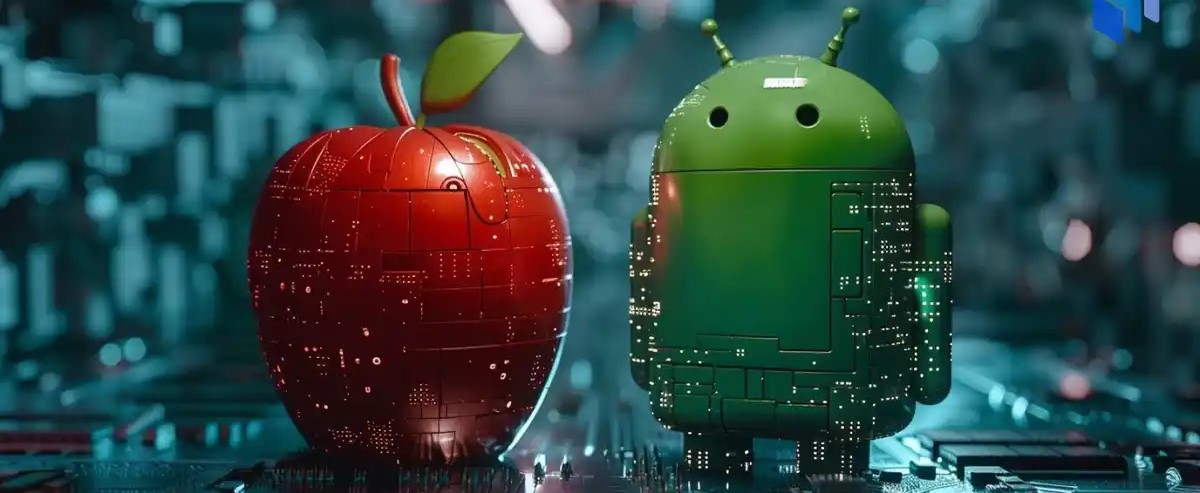

Esta es la continuación del notebook en el que analizábamos un dataset de teléfonos móviles.

En este apartado, vamos a desarrollar e implementar un sistema de recomendación de móviles. Para ello vamos a utilizar el algoritmo de machine learning KNN ( K-Nearest Neighbors, traducido como K vecinos más cercanos) para identificar patrones entre las preferencias de los usuarios y las características de los móviles.

#IMPORTACIONES

In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [6]:
from google.colab import files
uploaded = files.upload()

Saving MOBILE_rev.csv to MOBILE_rev.csv


In [7]:
#importamos el dataframe revisado con las modificaciones que le realizaciones en el análisis
df = pd.read_csv('MOBILE_rev.csv')

#MACHINE LEARNING

##PREPARACIÓN DE LOS DATOS

Para que los algoritmos de machine learning funcionen de manera eficiente, es fundamental que los datos estén en un formato adecuado. Dado que estos algoritmos trabajan mejor con números, vamos a seguir un proceso de codificación para algunas características de los móviles.

-Primero asignaremos un id único para cada móvil.

-Seguidamente codificaremos dos columnas que van a resultar decisivas en la elección de los móviles, que van a ser el tamaño de la pantalla y el precio. Para ello estableceremos categorías que posteriormente convertiremos en vectores binarios.



In [8]:
#este es el df original
df

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),OS,Country,Main camera
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999,iOS,United States,12
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199,Android,South Korea,108
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899,Android,China,48
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,Android,China,64
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799,Android,United States,50
...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049,Android,South Korea,12
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,Android,China,48
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099,iOS,United States,12
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429,Android,China,48


In [9]:
#generamos un id único de los móviles
df['ID'] = ['M' + str(i+1) for i in range(len(df))]

Continuamos con el campo del precio de los móviles, estableciendo cuatro rangos de precio:

-Low-end, que sería la categoría más baja, el nivel de entrada.

-Mid-range, o móviles de gama media.

-High-end, que serían los móviles de gama alta.

-Para finalizar tendríamos los Ultra-Premium, la gama más cara.

In [10]:
#creamos una nueva columna con la categoría de precio de los móviles, estableciendo los intervalos de precio
df['Mobile_category'] = pd.cut(df['Price ($)'], bins=[0, 300, 600, 1000, float('inf')], labels=['Low-end', 'Mid-range', 'High-end', 'Ultra-Premium'])  #float('inf') es un valor que representa infinito

In [11]:
#codificamos estos intervalos en columnas dummy
df = pd.get_dummies(df, columns=['Mobile_category'])

In [12]:
#vemos cómo ha quedado el df, y que hay dos cuestiones que deseamos corregir
df

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),OS,Country,Main camera,ID,Mobile_category_Low-end,Mobile_category_Mid-range,Mobile_category_High-end,Mobile_category_Ultra-Premium
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999,iOS,United States,12,M1,False,False,True,False
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199,Android,South Korea,108,M2,False,False,False,True
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899,Android,China,48,M3,False,False,True,False
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,Android,China,64,M4,True,False,False,False
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799,Android,United States,50,M5,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049,Android,South Korea,12,M403,False,False,False,True
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,Android,China,48,M404,False,True,False,False
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099,iOS,United States,12,M405,False,False,False,True
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429,Android,China,48,M406,False,True,False,False


In [13]:
#primero vamos a renombrar las nuevas columnas
df.rename(columns=lambda x: x.replace('Mobile_category_', ''), inplace=True)

In [14]:
#luego cambiamos sus valores booleanos por numéricos
dummy_columns = ['Low-end', 'Mid-range', 'High-end', 'Ultra-Premium']
df[dummy_columns] = df[dummy_columns].astype(int)

In [15]:
#comprobamos que ahora sí el df tiene el aspecto deseado
df

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),OS,Country,Main camera,ID,Low-end,Mid-range,High-end,Ultra-Premium
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999,iOS,United States,12,M1,0,0,1,0
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199,Android,South Korea,108,M2,0,0,0,1
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899,Android,China,48,M3,0,0,1,0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,Android,China,64,M4,1,0,0,0
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799,Android,United States,50,M5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049,Android,South Korea,12,M403,0,0,0,1
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,Android,China,48,M404,0,1,0,0
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099,iOS,United States,12,M405,0,0,0,1
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429,Android,China,48,M406,0,1,0,0


Vamos ahora con la última columna que deseamos codificar, la del tamaño de pantalla. En este caso vamos a establecer tres tamaños de pantalla:

-Small, tamaños de pantalla pequeños.

-Medium, tamaños de pantalla intermedios.

-Large, para aquellos tamaños de panalla grandes.

In [16]:
#para esta columna vamos a adoptar otro enfoque: crear una función que categorice el tamaño de pantalla, para luego aplicarla a una nueva columna
def categorize_screen(screen):
    if screen <= 5.5:
        return 'Small'
    elif screen <= 6.5:
        return 'Medium'
    else:
        return 'Large'

df['Size_category'] = df['Screen Size (inches)'].apply(categorize_screen)

In [17]:
#ahora lo vamos a codificar en columnas dummy, como en los anteriores casos
df = pd.get_dummies(df, columns=['Size_category'])

In [18]:
#renombramos las nuevas columnas
df.rename(columns=lambda x: x.replace('Size_category_', ''), inplace=True)

In [19]:
#luego cambiamos sus valores booleanos por numéricos
dummy_columns_2 = ['Large', 'Medium', 'Small']
df[dummy_columns_2] = df[dummy_columns_2].astype(int)

In [20]:
#podemos ver cómo queda el dataframe tras las incorporaciones
df

,Brand,Model,Storage (GB),RAM (GB),Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),OS,Country,Main camera,ID,Low-end,Mid-range,High-end,Ultra-Premium,Large,Medium,Small
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999,iOS,United States,12,M1,0,0,1,0,0,1,0
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199,Android,South Korea,108,M2,0,0,0,1,1,0,0
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899,Android,China,48,M3,0,0,1,0,1,0,0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,Android,China,64,M4,1,0,0,0,1,0,0
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799,Android,United States,50,M5,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049,Android,South Korea,12,M403,0,0,0,1,1,0,0
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,Android,China,48,M404,0,1,0,0,1,0,0
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099,iOS,United States,12,M405,0,0,0,1,1,0,0
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429,Android,China,48,M406,0,1,0,0,0,1,0


##CREACIÓN DE LOS USUARIOS

El siguiente paso es generar los usuarios, que hemos decidido que sean diez. Cada uno de estos usuarios va a contar con un móvil y queremos que la asignación de estos móviles no sea totalmente al azar. A cada usuario se le adjudicarán ciertas preferencias aleatoriamente en cuanto a los campos que hemos codificado (precio y tamaño de pantalla) y en base a estos criterios, se le será asignado un móvil.

In [21]:
#lo primero es establecer una semilla para que exista una replicabilidad en los resultados aleatorios
np.random.seed(10)

In [22]:
#generamos los 10 usuarios
num_users = 10
users = []  #creamos una lista vacía donde irán los distintos usuarios con sus características definidas aleatoriamente

In [23]:
#generamos esas características aleatorias
for i in range(num_users):
    price_category = np.random.choice(['Low-end', 'Mid-range', 'High-end', 'Ultra-Premium']) #a cada usuario se le asigna una categoría de precio
    screen_size_category = np.random.choice(['Small', 'Medium', 'Large']) #y también un tamaño de pantalla

#agregamos los usuarios y sus características a la lista
    users.append({'User': f'User_{i+1}', 'Price_category': price_category, 'ScreenSize_category': screen_size_category}) #con el f-string generamos los nombres de los usuarios, empezando por el 1

In [24]:
#convertimos users en un dataframe
users_df = pd.DataFrame(users)
users_df

,User,Price_category,ScreenSize_category
0,User_1,Mid-range,Medium
1,User_2,Low-end,Small
2,User_3,Mid-range,Small
3,User_4,Mid-range,Medium
4,User_5,Low-end,Medium
5,User_6,Mid-range,Large
6,User_7,Low-end,Medium
7,User_8,Low-end,Large
8,User_9,Low-end,Large
9,User_10,Low-end,Small


In [26]:
#creamos una función que asigne un móvil aleatorio que cumpla con las características del usuario
def assign_mobile(user):
#primero filtramos los móviles que cumplen con las características del usuario
    filtered_mobiles = df[(df[user['Price_category']] == 1) & (df[user['ScreenSize_category']] == 1)]

#luego elegimos un móvil aleatorio entre los móviles filtrados
    if len(filtered_mobiles) > 0:  #primero se verifica que filtered mobiles no esté vacío
        chosen_mobile = filtered_mobiles.sample() #se selecciona una fila aleatoria de filtered mobiles
        return chosen_mobile['Model'].values[0] #extraemos el nombre del móvil seleccionado
    else:
        return 'No hay móviles que cumplan con las características'  #incluimos este aviso por si no hay móviles que reúnan ciertas características

#creamos una nueva columna en la que aplicarmos la función assign_mobile a cada usuario
users_df['Assigned_mobile'] = users_df.apply(assign_mobile, axis=1)

users_df

,User,Price_category,ScreenSize_category,Assigned_mobile
0,User_1,Mid-range,Medium,GT Master Edition
1,User_2,Low-end,Small,S42
2,User_3,Mid-range,Small,iPhone SE (2020)
3,User_4,Mid-range,Medium,V21e
4,User_5,Low-end,Medium,8 5G
5,User_6,Mid-range,Large,Galaxy M51
6,User_7,Low-end,Medium,C20 Plus
7,User_8,Low-end,Large,Y21s
8,User_9,Low-end,Large,Y33
9,User_10,Low-end,Small,S42


##VECTORIZACIÓN DE LAS CARACTERÍSTICAS

Ahora que ya tenemos los usuarios con sus preferencias de características de los móviles, necesitamos vectorizar estas características para que puedan ser procesadas por los algoritmos de aprendizaje automático.

In [27]:
#creamos una función para obtener el vector de características de cada usuario
def get_user_vector(user):
    price_categories = ['Low-end', 'Mid-range', 'High-end', 'Ultra-Premium'] #lista que contiene las categorías de precios
    screen_size_categories = ['Small', 'Medium', 'Large'] #lista que contiene las categorías de tamaños de pantalla

    user_vector = []  #creamos una lista vacía donde se almacenarán las características del usuario codificadas como 0 o 1

    for category in price_categories: #creamos un for que recorre la lista price_categories
        if category == user['Price_category']: #si una determinada categoría coincide con la categoría del precio del usuario...
            user_vector.append(1) #...se añade un 1, lo que indica que ese usuario prefiere esa categoría de precio
        else:
            user_vector.append(0) #si la categoría actual no coincide, se añade un 0

    for category in screen_size_categories: #iteramos también sobre la lista screen_size_categories
        if category == user['ScreenSize_category']:
            user_vector.append(1) #añadimos a la lista user_vector 1 si hay coincidencia entre la categoría actual y la categoría preferida del usuario
        else:
            user_vector.append(0)

    return user_vector #la función devuelve user_vector, que es una lista de números binarios, que son las preferencias de los usuarios en cuanto categorías de precio y tamaño de pantalla

##ENTRENAMIENTO DEL MODELO DE KNN

Para recomendar móviles a los usuarios, hemos optado por utilizar el algoritmo de K-Nearest Neighbors (KNN). Este algoritmo de aprendizaje supervisado se usa comúnmente para encontrar los puntos más cercanos en un espacio de características. A continuación, entrenamos el modelo KNN con las características codificadas de los móviles disponibles.

In [28]:
#creamos un dataframe que contenga únicamente las características codificadas de los móviles
mobile_features = df[['Low-end', 'Mid-range', 'High-end', 'Ultra-Premium', 'Small', 'Medium', 'Large']].values

In [29]:
#entrenamos el modelo
knn = NearestNeighbors(n_neighbors=3).fit(mobile_features) #ponemos 3 como número de vecinos por si de primeras hay alguna coincidencia entre el móvil recomendado y el móvil previamente asignado

##DESARROLLO DEL MODELO

En este apartado, implementamos una función de recomendación utilizando el algoritmo KNN. La función recomienda un móvil a cada usuario basado en sus preferencias vectorizadas (acerca de las categorías de precio y el tamaño de pantalla), asegurando que el móvil recomendado sea distinto del previamente asignado.

Finalmente la recomendación se añade al dataframe de usuarios.

In [30]:
#creamos una función para recomendar un móvil a cada usuario
def recommend_mobile(user, assigned_mobile):
    user_vector = get_user_vector(user)  #llamamos a la función get_user_vector para obtener el vector de características de cada usuario
    user_vector = np.array(user_vector).reshape(1, -1)  #convertimos cada vector en un array de dos dimensiones, dado que la función kneighbors espera un array en esa forma

    distances, indices = knn.kneighbors(user_vector)  #buscamos el móvil más cercano al vector de características del usuario
#distances es un array que contiene las distancias desde el usuario hasta los vecinos más cercanos. En este caso, una distancia de 0 implicaría que los dos móviles serían idénticos en cuanto a las características
#indices es un array que contiene los índices de los móviles más cercanos en el df original
#nos aseguramos que el móvil recomendado no sea el mismo que el móvil asignado
    for indice in indices.flatten(): #iteramos sobre indices, que contiene los índices de los vecinos más cercanos. Con flatten lo paso a un array de una dimensión
      recommended_mobile = df.iloc[indice]['Model'] #accedemos al nombre del móvil del índice seleccionado
      if recommended_mobile != assigned_mobile: #si NO hay coincidencia entre el móvil recomendado y el asignado...
        return recommended_mobile #se devuelve el nombre del móvil recomendado

    return 'No hay móviles alternativos disponibles' #mensaje que aparecería si todos los móviles recomendados coinciden con el móvil asignado


In [31]:
#creamos una nueva columna donde aplicamos esta función
users_df['Recommended_mobile'] = users_df.apply(lambda x: recommend_mobile(x, x['Assigned_mobile']), axis=1)

In [32]:
#mostramos la tabla ya con el añadido del móvil recomendado
users_df

,User,Price_category,ScreenSize_category,Assigned_mobile,Recommended_mobile
0,User_1,Mid-range,Medium,GT Master Edition,A94
1,User_2,Low-end,Small,S42,iPhone 12 mini
2,User_3,Mid-range,Small,iPhone SE (2020),KEY2 LE
3,User_4,Mid-range,Medium,V21e,A94
4,User_5,Low-end,Medium,8 5G,Redmi 10 Prime
5,User_6,Mid-range,Large,Galaxy M51,Mi 11 Lite 5G NE
6,User_7,Low-end,Medium,C20 Plus,Redmi 10 Prime
7,User_8,Low-end,Large,Y21s,Y20s (G)
8,User_9,Low-end,Large,Y33,Y20s (G)
9,User_10,Low-end,Small,S42,iPhone 12 mini
